In [1]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings('ignore') 

### 1. Data Ingestion and Basic Overview

In [2]:
#Import dataset
df = pd.read_csv('heart_attack_prediction_dataset.csv')

In [3]:
df.head()

Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  \
0  31.251233            286                                0   
1  27.194973            235                                1   
2  28.176571            587                                4   
3  36.464704            378                                3   
4  21.809144            231                                1   

   Sleep Hours Per Day    Country      Continent           Hemisphere  \
0                    6  Argentina  South America  Southern Hemisphere   
1                    7     Canada  North America  Northern Hemisphere   
2                    4     France         Europe  Northern Hemisphere   
3                    4     Canada  North America  Northern Hemisphere   
4                    5   Thailand           Asia  Northern Hemisphere   

   Heart Attack Risk  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 26 columns]

In [4]:
#Data Schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [5]:
#Descriptive Statistics of the data
df.describe()

Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313                 5.783745   
min       0.000000     0.000000             0.000000                 0.002442   
25%       1.000000     0.000000             0.000000                 4.981579   
50%       1.000000     1.000000             1.000000                10.069559   
75%       1.000000     1.000000             1.000000                15.050018   
max       1.000000     1.000000             1.000000                19.998709   

       Previous Heart Problems  Medication Use  Stress Level  \
count              8763.000000     8763.000000   8763.000000   
mean                  0.495835        0.498345      5.469702   
std                   0.500011        0.500026      2.859622   
min                   0.000000        0.000000      1.000000   
25%                   0.000000        0.000000      3.000000   
50%                   0.000000        0.000000      5.000000   
75%                   1.000000        1.000000      8.000000   
max                   1.000000        1.000000     10.000000   

       Sedentary Hours Per Day         Income          BMI  Triglycerides  \
count              8763.000000    8763.000000  8763.000000    8763.000000   
mean                  5.993690  158263.181901    28.891446     417.677051   
std                   3.466359   80575.190806     6.319181     223.748137   
min                   0.001263   20062.000000    18.002337      30.000000   
25%                   2.998794   88310.000000    23.422985     225.500000   
50%                   5.933622  157866.000000    28.768999     417.000000   
75%                   9.019124  227749.000000    34.324594     612.000000   
max                  11.999313  299954.000000    39.997211     800.000000   

       Physical Activity Days Per Week  Sleep Hours Per Day  Heart Attack Risk  
count                      8763.000000          8763.000000        8763.000000  
mean                          3.489672             7.023508           0.358211  
std                           2.282687             1.988473           0.479502  
min                           0.000000             4.000000           0.000000  
25%                           2.000000             5.000000           0.000000  
50%                           3.000000             7.000000           0.000000  
75%                           5.000000             9.000000           1.000000  
max                           7.000000            10.000000           1.000000

### 2. Data Cleaning and Pre-processing

In [6]:
#Check for duplicate values
df.duplicated().sum()

0

In [7]:
#Check for missing values
df.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

The dataset looks clean and void of any missing values to proceed with the Data Visualization and Predictive Analytics.

In [8]:
cat_col_list = df.select_dtypes(include ='object').columns.tolist()
cat_col_list

['Patient ID',
 'Sex',
 'Blood Pressure',
 'Diet',
 'Country',
 'Continent',
 'Hemisphere']

In [9]:
num_col_list = df.select_dtypes(include= 'number').columns.to_list()
num_col_list

['Age',
 'Cholesterol',
 'Heart Rate',
 'Diabetes',
 'Family History',
 'Smoking',
 'Obesity',
 'Alcohol Consumption',
 'Exercise Hours Per Week',
 'Previous Heart Problems',
 'Medication Use',
 'Stress Level',
 'Sedentary Hours Per Day',
 'Income',
 'BMI',
 'Triglycerides',
 'Physical Activity Days Per Week',
 'Sleep Hours Per Day',
 'Heart Attack Risk']

### 3. Data Visualization

In [10]:
df.to_csv('Cleaned_dataset.csv', index = False)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Heart Attack Risk Visualization using Pie Chart

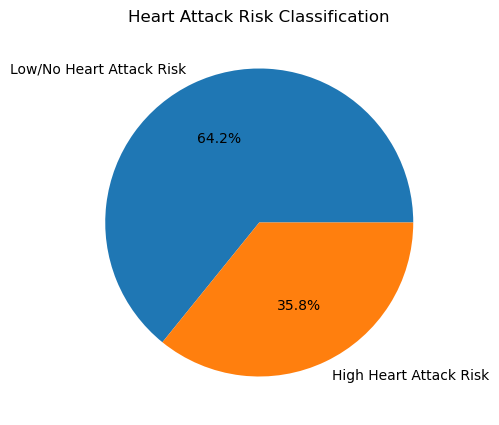

In [12]:
plt.figure(figsize=(5,5))
labels = ['Low/No Heart Attack Risk', 'High Heart Attack Risk']
df['Heart Attack Risk'].value_counts().plot(kind='pie',labels=labels,autopct='%1.1f%%')
plt.title('Heart Attack Risk Classification')
plt.ylabel('')
plt.show()

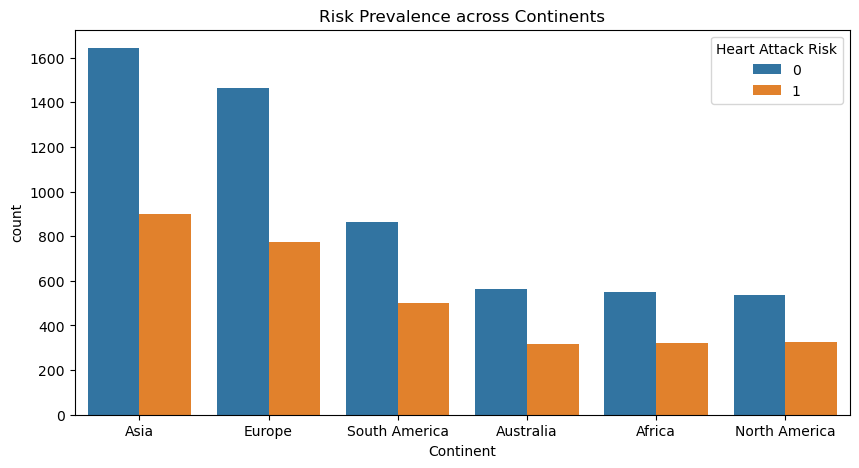

In [13]:
plt.figure(figsize=(10,5))
order1 = df['Continent'].value_counts().index
df['Heart Attack Risk'] = df['Heart Attack Risk'].astype(str)
sns.countplot(data=df, x='Continent', hue = 'Heart Attack Risk', order=order1)
plt.title('Risk Prevalence across Continents',fontsize=12)
plt.show()

### 4. Predictive Analytics

#### Data Transformation

In [14]:
df = pd.get_dummies(df, columns=['Sex', 'Diet', 'Continent', 'Hemisphere'], dtype=int)
df[['Systolic','Dystolic']]=df['Blood Pressure'].str.split('/',expand=True).astype(int)
df=df.drop(columns={'Blood Pressure'})
df.head()

Patient ID  Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0    BMW7812   67          208          72         0               0        1   
1    CZE1114   21          389          98         1               1        1   
2    BNI9906   21          324          72         1               0        0   
3    JLN3497   84          383          73         1               1        1   
4    GFO8847   66          318          93         1               1        1   

   Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  \
0        0                    0                 4.168189  ...   
1        1                    1                 1.813242  ...   
2        0                    0                 2.078353  ...   
3        0                    1                 9.828130  ...   
4        1                    0                 5.804299  ...   

   Continent_Africa  Continent_Asia  Continent_Australia  Continent_Europe  \
0                 0               0                    0                 0   
1                 0               0                    0                 0   
2                 0               0                    0                 1   
3                 0               0                    0                 0   
4                 0               1                    0                 0   

   Continent_North America  Continent_South America  \
0                        0                        1   
1                        1                        0   
2                        0                        0   
3                        1                        0   
4                        0                        0   

   Hemisphere_Northern Hemisphere  Hemisphere_Southern Hemisphere  Systolic  \
0                               0                               1       158   
1                               1                               0       165   
2                               1                               0       174   
3                               1                               0       163   
4                               1                               0        91   

  Dystolic  
0       88  
1       93  
2       99  
3      100  
4       88  

[5 rows x 36 columns]

#### Data Splitting

In [15]:
from sklearn.model_selection import train_test_split

# separate features and target
X = df.drop(columns = ["Patient ID", "Heart Attack Risk", 'Country','Income', 'BMI',])
y = df["Heart Attack Risk"]

# split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [16]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred = pipe.predict(X_test)
accuracy_score(y_pred, y_test)

0.6354820308043354

In [18]:
predictions = pipe.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1114
           1       0.00      0.00      0.00       639

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.40      0.64      0.49      1753



The model predicts an accuracy of 64% for Heart Attack risk prediction using Logistic Regression Model. 

In [19]:
# Get the model from the pipeline
model = pipe.named_steps['logisticregression']

# Get feature names from the DataFrame
feature_names = X.columns

# Get the coefficients of the logistic regression model
coefficients = model.coef_[0]

# Create a DataFrame for easy handling
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
})

# Sort by the absolute values of the coefficients
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

# Plot
plt.figure(figsize=(10, 10))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='b')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance on Predicting Heart Attack Risk (Logistic Regression Coefficients)')
plt.show()

The plot of feature importance emphasizes that the Systolic blood pressure, Diabetes, Cholesterol and Age are the major factors influencing the risk of Heart Attack, whereas Sleep, Obesity and other features have the least influence the heart attack risk prediction in the model.

In [20]:
X.columns

Index(['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Sex_Female',
       'Sex_Male', 'Diet_Average', 'Diet_Healthy', 'Diet_Unhealthy',
       'Continent_Africa', 'Continent_Asia', 'Continent_Australia',
       'Continent_Europe', 'Continent_North America',
       'Continent_South America', 'Hemisphere_Northern Hemisphere',
       'Hemisphere_Southern Hemisphere', 'Systolic', 'Dystolic'],
      dtype='object')

#### Test cases

In [21]:
#Case 1
test = {'Age' : 45, 'Cholesterol' : 340, 'Heart Rate' : 95, 'Diabetes' : 0, 'Family History' : 1,
       'Smoking' : 0, 'Obesity' : 1, 'Alcohol Consumption' : 0, 'Exercise Hours Per Week' : 5,
       'Previous Heart Problems' : 0, 'Medication Use' : 1, 'Stress Level' : 5,
       'Sedentary Hours Per Day' : 8, 'Triglycerides': 300,
       'Physical Activity Days Per Week' : 5, 'Sleep Hours Per Day' : 6, 'Sex_Female' : 0,
       'Sex_Male' : 1, 'Diet_Average' : 0, 'Diet_Healthy' : 1, 'Diet_Unhealthy' : 0,
       'Continent_Africa': 0, 'Continent_Asia' : 0, 'Continent_Australia' : 1,
       'Continent_Europe' : 0, 'Continent_North America' : 0,
       'Continent_South America' :0, 'Hemisphere_Northern Hemisphere' : 0,
       'Hemisphere_Southern Hemisphere': 1, 'Systolic' : 130, 'Dystolic': 80}
X_test = pd.DataFrame(data = test, index= [0])
X_test
# Evaluate model
y_pred = model.predict(X_test)
if y_pred == '1':
    print('High Risk of Heart Attack')
else: 
    print('Low/No Risk of Heart Attack')

High Risk of Heart Attack


#### Predicting the risk of Heart Attack from User Input

In [22]:
age = int(input('Enter the your age : \n'))
gender = str(input("Enter your sex (Type 'M' for Male, 'F' for Female): \n"))
continent = str(input("Enter your continent: \n")) 
chl =  int(input("Enter your cholesterol level: \n"))
systolic = int(input("Enter your systolic blood pressure: \n"))
dystolic = int(input("Enter your dystolic blood pressure: \n"))
hrtrate = int(input("Enter your heart rate: \n"))
trigly =  int(input("Enter your triglyceride levels : \n"))
diabetes = int(input("Do you have Diabetes (Type 1 if Yes, else type 0): \n")) 
famhist  = int(input("Any Family History of heart attacks (Type 1 if Yes, else type 0): \n"))
smoking = int(input("Any Smoking history (Type 1 if Yes, else type 0): \n"))
obesity = int(input("Would you describe yourself as obese? (Type 1 if Yes, else type 0): \n"))
alcoholic = int(input("Would you describe as Alcoholic? (Type 1 if Yes, else type 0): \n"))
ex_per_week = int(input("How many hours do you exercise per week?  \n"))
prev_heart_prob = int(input("Do you have any history of heart issues? (Type 1 if Yes, else type 0): \n"))
medicine_use = int(input("Are you currently on any medication? (Type 1 if Yes, else type 0): \n"))
stress = int(input("Are stressed do you feel often? (Type anywhere between 1 and 10 with 1 being less stressed and 10 being most stressed): \n"))
sedan_hrs  = int(input("How many hours do you relax per day (sedantary hours)? \n"))
phy_activity = int(input("How many hours do you spend for physical activity per week?  \n"))
sleep =  int(input("How many hours do you sleep per day?  \n"))
diet = int(input("How would you describe your diet? (Type 1 for Average, 2 for Healthy, 3 for Unhealthy):  \n"))
print("Calculating your risk based on your answers............... \nYou have ")



Enter the your age : 
 28
Enter your sex (Type 'M' for Male, 'F' for Female): 
 F
Enter your continent: 
 North America
Enter your cholesterol level: 
 234
Enter your systolic blood pressure: 
 128
Enter your dystolic blood pressure: 
 30
Enter your heart rate: 
 78
Enter your triglyceride levels : 
 120
Do you have Diabetes (Type 1 if Yes, else type 0): 
 0
Any Family History of heart attacks (Type 1 if Yes, else type 0): 
 0
Any Smoking history (Type 1 if Yes, else type 0): 
 0
Would you describe yourself as obese? (Type 1 if Yes, else type 0): 
 0
Would you describe as Alcoholic? (Type 1 if Yes, else type 0): 
 0
How many hours do you exercise per week?  
 3
Do you have any history of heart issues? (Type 1 if Yes, else type 0): 
 0
Are you currently on any medication? (Type 1 if Yes, else type 0): 
 0
Are stressed do you feel often? (Type anywhere between 1 and 10 with 1 being less stressed and 10 being most stressed): 
 4
How many hours do you relax per day (sedantary hours)? 
 6
H

Calculating your risk based on your answers............... 
You have 


In [23]:
def convert_sex(sx):
    if sx == 'M':
        return 0,1
    else:
        return 1,0
        
def convert_diet(dt):
    if dt == 1:
        return 1,0,0
    elif dt == 2:
        return 0,1,0
    else:
        return 0,0,1
        
def convert_country(cntry):
    if cntry == 'Africa':
        return 1,0,0,0,0,0
    elif cntry == 'Asia':
        return 0,1,0,0,0,0
    elif cntry == 'Australia':
        return 0,0,1,0,0,0
    elif cntry == 'Europe':
        return 0,0,0,1,0,0
    elif cntry == 'North America':
        return 0,0,0,0,1,0
    else:
        return 0,0,0,0,0,1

def convert_hemi(continent):
    if continent == 'Australia' or 'South America':
        return 0,1
    else:
        return 1,0
        
sex1, sex2 = convert_sex(gender)
dt1, dt2, dt3 = convert_diet(diet)
cntr1, cntr2,cntr3,cntr4,cntr5,cntr6 =  convert_country(continent)
hemi_n, hemi_s = convert_hemi(continent)

In [24]:
test = {'Age' : age, 'Cholesterol' : chl, 'Heart Rate' : hrtrate, 'Diabetes' : diabetes, 'Family History' : famhist,
       'Smoking' : smoking, 'Obesity' : obesity, 'Alcohol Consumption' : alcoholic, 'Exercise Hours Per Week' : ex_per_week,
       'Previous Heart Problems' : prev_heart_prob, 'Medication Use' : medicine_use, 'Stress Level' : stress,
       'Sedentary Hours Per Day' : sedan_hrs, 'Triglycerides': trigly,
       'Physical Activity Days Per Week' : phy_activity, 'Sleep Hours Per Day' : sleep, 'Sex_Female' : sex1,
       'Sex_Male': sex2 , 'Diet_Average' :dt1, 'Diet_Healthy' : dt2, 'Diet_Unhealthy' : dt3,
       'Continent_Africa': cntr1,  'Continent_Asia' : cntr2, 'Continent_Australia' : cntr3,
       'Continent_Europe' :cntr4, 'Continent_North America' :cntr5,
       'Continent_South America' :cntr6, 'Hemisphere_Northern Hemisphere' :hemi_n, 
       'Hemisphere_Southern Hemisphere':hemi_s,'Systolic' : systolic, 'Dystolic': dystolic}

X_test = pd.DataFrame(data = test, index= [0])
X_test
# Evaluate model and print the assessment
y_pred = model.predict(X_test)
if y_pred == '1':
    print('High Risk of Heart Attack')
else: 
    print('Low/No Risk of Heart Attack')

High Risk of Heart Attack


This is an initial prototype of the prediction and the model requires more training and testing and validation using other algorithms to make an accurate prediction.